In [ ]:
#the input file (xxx.txt) is the output atomic position file from Calatom Software as described in Method Section

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from PIL import Image

In [13]:
dataraw = np.loadtxt("atomic_positions.txt") # An example for Fig.3E
im = Image.open("HAADF_image.tif") # Fig.3E

In [15]:
data = dataraw
data = np.insert(data, 2, 0, axis=1)
data = np.insert(data, 2, 0, axis=1)

In [18]:
#in-plane, the pixel is calibrated from images

for i in data:
    for j in data:
        x = i[0]-j[0]
        y = i[1]-j[1]
        if y > -10 and y < 10 and x > 45 and x < 90:
            i[2] = (x**2+y**2)**0.5

In [19]:
data[:,2] = data[:,2]*0.977 # 0.977 is calculated from microscope pixel-size calibration
data[:,2] = data[:,2]*0.06371 # pixel size

In [20]:
datanox = np.delete(data, np.where(data[:,2] < 0.3), axis=0)
datanox = np.delete(datanox, np.where(datanox[:,2] > 1000), axis=0)

In [21]:
print(np.average(datanox[:,2], axis=0))
print(np.std(datanox[:,2], axis=0))
datanox[:,3] = (datanox[:,2]-4.467)/4.467*100

4.177721161918832
0.017166327177886822


In [22]:
print(np.average(datanox[:,3], axis=0))
print(np.std(datanox[:,3], axis=0))

-6.475908620576844
0.3842920792005109


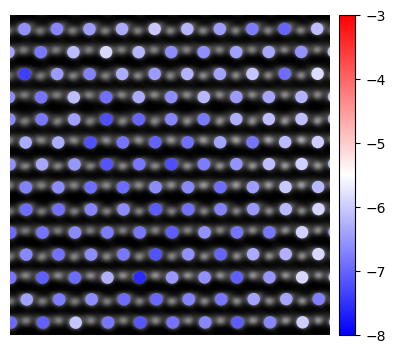

In [23]:
plt.figure(figsize=(5,5))
plt.scatter(datanox[:,0], datanox[:,1], c= datanox[:,3], s=80, edgecolors='none',marker = "o", 
            cmap=plt.cm.bwr, vmin = -8, vmax = -3)
plt.colorbar(pad=0.025 , shrink=0.83)
plt.xlim((660, 1320)) #660by660
plt.ylim((82, 742))
plt.imshow(im)
plt.gca().set_aspect(1)
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()